In [93]:
import pandas as pd
!pip install matplotlib
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [94]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "AMZN_2012-05-19_2025-04-06.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "muhammadatiflatif/amzn-daily-stock-prices-dataset",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

df.head()


,date,open,high,low,close,adj_close,volume
0,2012-05-21 00:00:00-04:00,10.7015,10.9990,10.641,10.9055,10.9055,71596000
1,2012-05-22 00:00:00-04:00,10.9155,10.9435,10.698,10.7665,10.7665,74662000
2,2012-05-23 00:00:00-04:00,10.7355,10.8775,10.559,10.8640,10.8640,84876000
3,2012-05-24 00:00:00-04:00,10.8490,10.8830,10.635,10.7620,10.7620,62822000
4,2012-05-25 00:00:00-04:00,10.7495,10.7990,10.611,10.6445,10.6445,43428000


In [101]:
df['date'] = pd.to_datetime(df['date'], utc=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3238 entries, 0 to 3237
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   date       3238 non-null   datetime64[ns, UTC]
 1   open       3238 non-null   float64            
 2   high       3238 non-null   float64            
 3   low        3238 non-null   float64            
 4   close      3238 non-null   float64            
 5   adj_close  3238 non-null   float64            
 6   volume     3238 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(1)
memory usage: 177.2 KB
None


In [96]:
print(df.describe())

              open         high          low        close    adj_close  \
count  3238.000000  3238.000000  3238.000000  3238.000000  3238.000000   
mean     85.947427    86.922465    84.877483    85.926523    85.926523   
std      61.878375    62.586234    61.092737    61.850855    61.850855   
min      10.370000    10.561500    10.318500    10.411000    10.411000   
25%      25.316999    25.622375    24.808000    25.194000    25.194000   
50%      84.838753    85.566002    83.625248    84.627998    84.627998   
75%     142.050003   143.938499   139.819996   142.502506   142.502506   
max     239.020004   242.520004   238.029999   242.059998   242.059998   

             volume  
count  3.238000e+03  
mean   7.410096e+07  
std    4.055279e+07  
min    1.500750e+07  
25%    4.913950e+07  
50%    6.332500e+07  
75%    8.659328e+07  
max    4.771220e+08  


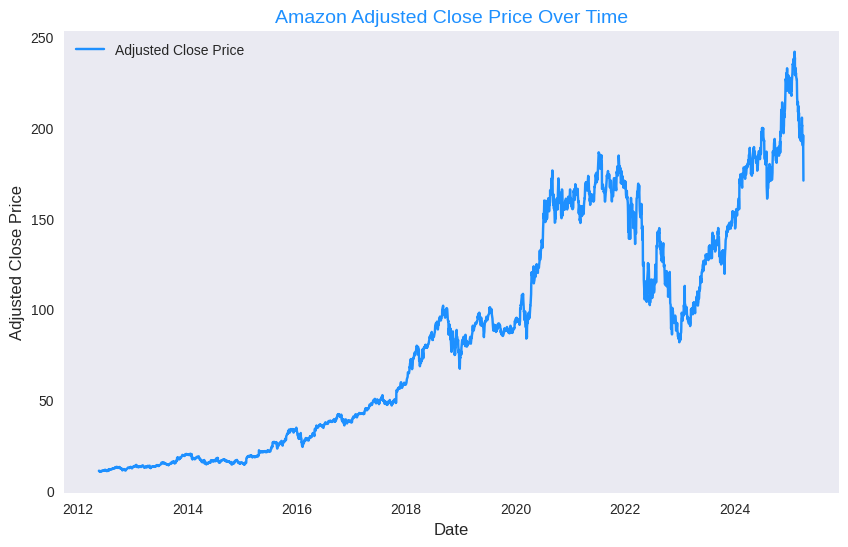

In [104]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['adj_close'], label='Adjusted Close Price', color='dodgerblue')
plt.title('Amazon Adjusted Close Price Over Time', fontsize=14, color= "dodgerblue")
plt.xlabel('Date', fontsize=12)
plt.ylabel('Adjusted Close Price', fontsize=12)
plt.legend()
plt.grid()
plt.style.use('seaborn-v0_8')
plt.show()

In [98]:
# Encontrar las fechas con máximos y mínimos históricos.
max_price = df.loc[df['adj_close'].idxmax()]
min_price = df.loc[df['adj_close'].idxmin()]

print(f"Highest price was on {max_price['date']} with a value of {max_price['adj_close']:.2f}")
print(f"Lowest price was on {min_price['date']} with a value of {min_price['adj_close']:.2f}")


Highest price was on 2025-02-04 00:00:00-05:00 with a value of 242.06
Lowest price was on 2012-06-01 00:00:00-04:00 with a value of 10.41


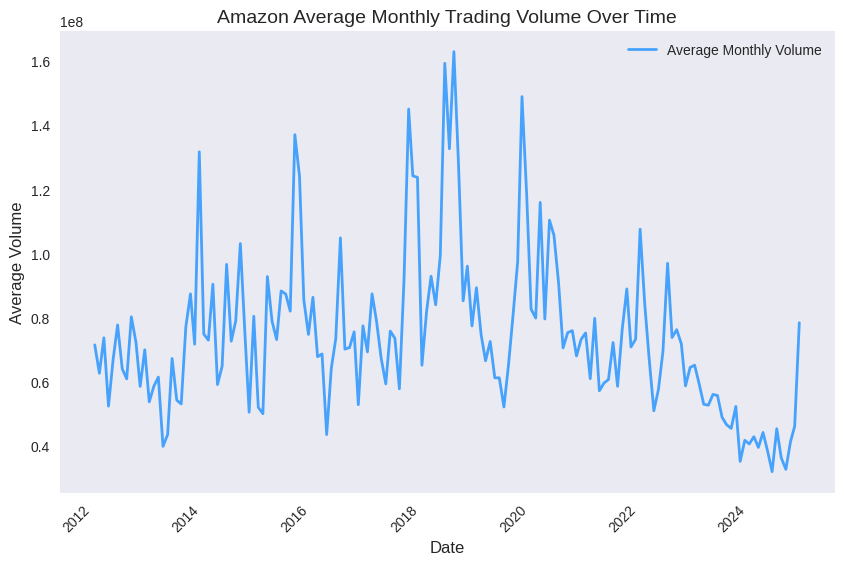

In [106]:
df['date'] = pd.to_datetime(df['date'], utc=True)
# Agrupamos los datos por mes para reducir la densidad
df['month'] = df['date'].dt.to_period('M')  # Convertimos las fechas a periodos mensuales
monthly_volume = df.groupby('month')['volume'].mean().reset_index()  # Calculamos el volumen promedio mensual

# Convertimos la columna 'month' a tipo datetime para graficarla
monthly_volume['month'] = monthly_volume['month'].dt.to_timestamp()

# Creamos un gráfico con los datos mensuales
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
plt.plot(
    monthly_volume['month'],
    monthly_volume['volume'],
    label='Average Monthly Volume',
    color='dodgerblue',
    linewidth=2,
    alpha=0.8
)
plt.title('Amazon Average Monthly Trading Volume Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Volume', fontsize=12)
plt.xticks(rotation=45)  # Rotamos las etiquetas del eje X para mejor lectura
plt.legend()
plt.grid()
plt.show()
